<a href="https://colab.research.google.com/github/vpagonis/Classical_Mechanics_2nd_Edition/blob/main/Chapter6/Python_Codes_Chapter_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 6.1

In [ ]:
%reset -f

from sympy import symbols, Function, Derivative as D, dsolve

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define function x and various symbols
x = Function('x')
omega, t = symbols('omega, t', real=True, positive=True)
x0, v0 = symbols('x0, v0', real=True)

soln = dsolve(D(x(t), t, t) +omega**2*x(t), x(t),\
simplify=True).rhs
print('The general symbolic solution is:\n', 'x(t) =',soln)

initCondits = {x(0): x0, D(x(t),t).subs(t, 0): v0}

soln = dsolve(D(x(t), t, t) +omega**2*x(t), x(t),\
simplify=True,ics=initCondits).rhs

print('\nThe solution with the initial conditions x(0)=x0, v(0)=v0 \
 is:', '\nx(t) =',soln)


---------------------------- CODE OUTPUT ----------------------------- 

The general symbolic solution is:
 x(t) = C1*sin(omega*t) + C2*cos(omega*t)

The solution with the initial conditions x(0)=x0, v(0)=v0  is: 
x(t) = x0*cos(omega*t) + v0*sin(omega*t)/omega


# Example 6.2

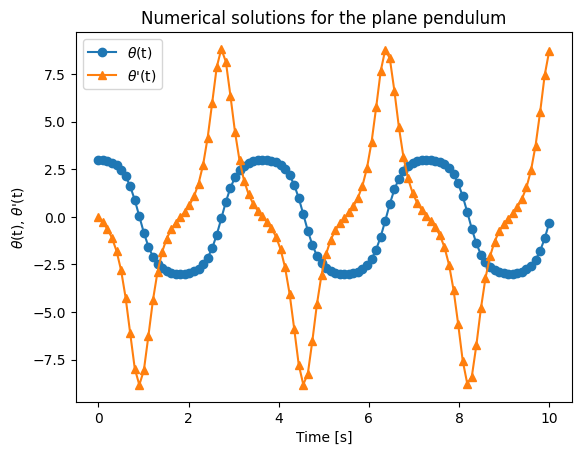

In [ ]:
%reset -f

from scipy.integrate import odeint

import numpy as np
import matplotlib.pyplot as plt

L = 0.5		# length of pendulum
g = 9.8		# gravitational acceleration

# function to define the ODE for pendulum
def deriv(y, time):
    return (y[1], - (g/L)* np.sin(y[0]))

# define times t
t = np.linspace(0, 10, 100)

# initial conditions theta(0)=3 rad,  theta'(0)=0
yinit = (3, 0)

# solve numerically using scipy odeint() function
y = odeint(deriv, yinit, t)

# plot angle and anglar velocity as functions of time
plt.plot(t, y[:, 0], 'o-',label=r'$\theta$(t)')
plt.plot(t, y[:, 1], '^-',label=r"$\theta$'(t)")

plt.legend(loc='best')
plt.xlabel('Time [s]')
plt.ylabel(r"$\theta$(t), $\theta$'(t)")
plt.title('Numerical solutions for the plane pendulum')
plt.show()


# Example 6.3

In [ ]:
%reset -f

from sympy import symbols, Function, Derivative as D, dsolve

import textwrap

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define function x and various symbols
x = Function('x')
gamma, t ,omega = symbols('gamma, t ,omega', real=True)

# overdamped and underdamped oscaillation
soln = dsolve(D(x(t), t, t) + 2*gamma*D(x(t), t) + omega**2*x(t), x(t),\
   simplify=True).rhs

print('For overdamped and underdamped oscillations the \
solution is : \n\nx(t) =', textwrap.fill(str(soln),63))

# critically damped oscillation:  gamma=omega
soln = dsolve(D(x(t), t, t) + 2*omega*D(x(t), t) +\
              omega**2*x(t), x(t)).rhs

print('\nFor critically damped oscillations, the symbolic \
solution is:\n  x(t) =',soln)


---------------------------- CODE OUTPUT ----------------------------- 

For overdamped and underdamped oscillations the solution is : 

x(t) = C1*exp(t*(-gamma + sqrt(gamma**2 - omega**2))) +
C2*exp(-t*(gamma + sqrt(gamma**2 - omega**2)))

For critically damped oscillations, the symbolic solution is:
  x(t) = (C1 + C2*t)*exp(-omega*t)


# Example 6.4

In [ ]:
%reset -f

from sympy import symbols, Function, Derivative as D, dsolve, sqrt

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define function x and various symbols
x = Function('x')
t = symbols('t', real=True)

m, k, b = 1, 1, 3

# overdamped oscillation
soln = dsolve(m*D(x(t), t, t)+b*D(x(t), t) +k*x(t), x(t), \
   simplify=True).rhs

print('\nFor overdamped oscillations the solution :\nx(t) =',soln)

m, k, b = 1, 1, 1
soln = dsolve(m*D(x(t), t, t)+b*D(x(t), t) +k*x(t), x(t), \
   simplify=True).rhs

print('\nFor underdamped oscillations the solution :\nx(t) =',soln)

m, k = 1, 1
b = 2*sqrt(k*m)   # condition for critical SHO
soln = dsolve(m*D(x(t), t, t)+ b*D(x(t), t) + k*x(t), x(t), \
   simplify=True).rhs

print('\nFor critically damped oscillations the solution :\nx(t) =',soln)


---------------------------- CODE OUTPUT ----------------------------- 


For overdamped oscillations the solution :
x(t) = C1*exp(t*(-3 + sqrt(5))/2) + C2*exp(-t*(sqrt(5) + 3)/2)

For underdamped oscillations the solution :
x(t) = (C1*sin(sqrt(3)*t/2) + C2*cos(sqrt(3)*t/2))*exp(-t/2)

For critically damped oscillations the solution :
x(t) = (C1 + C2*t)*exp(-t)


# Example 6.5

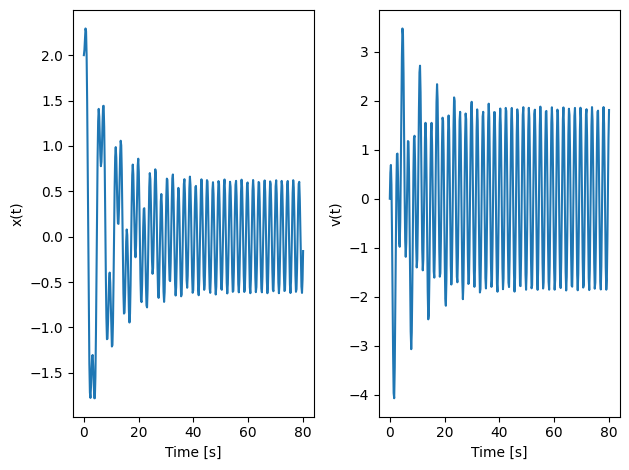

In [ ]:
%reset -f

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# SI values of mass, spring constant, force amplitude
b, m, k, Fo, om = 0.2, 1, 1, 5, 3

def deriv(y, time):
    return (y[1], -(b/m)*y[1] - (k/m)*y[0]+Fo/m* np.cos(om*time))

t = np.linspace(0, 80, 400)
yinit = (2, 0)

soln = odeint(deriv, yinit, t)

plt.subplot(1,2,1)
plt.plot(t, soln[:, 0], '-')
plt.ylabel('x(t)')
plt.xlabel('Time [s]')

plt.subplot(1,2,2)
plt.plot(t, soln[:, 1], '-')
plt.ylabel('v(t)')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.show()


# Example 6.6

---------------------------- CODE OUTPUT ----------------------------- 


The steady state for w=0.1 is:
  x(t) =  0.0204*sin(0.1*t) + 1.01*cos(0.1*t)


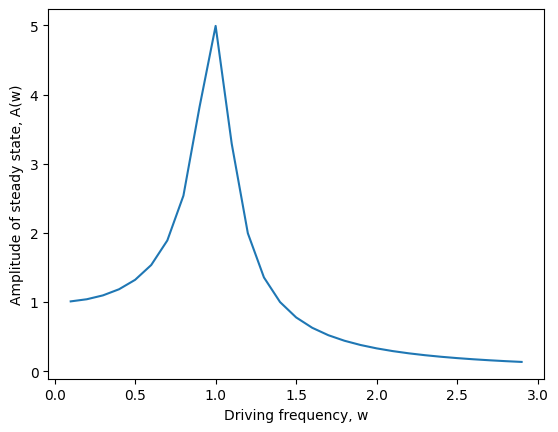

In [ ]:
%reset -f

from sympy import symbols, Function, Derivative as D,\
    dsolve, lambdify, cos, N, Add
import numpy as np
import matplotlib.pyplot as plt

print('-'*28,'CODE OUTPUT','-'*29,'\n')
x = Function('x')
t = symbols('t')
F, wo, gm = 1, 1, .1

#initial conditions x(0)=1  and v(0)=0
initCondits = {x(0): 1, D(x(t),t).subs(t, 0): 0}

def findmax(w):
    # solve the ode to find the full analytical solution soln
    soln = dsolve(D(x(t), t, t)+2*gm*D(x(t), t) +wo**2*x(t)-F*cos(w*t),
      x(t),simplify=True,ics=initCondits).rhs

    v = Add.make_args(soln)     # select steady state part of the soln
    xsteady = v[0]+v[1]
    if (w == 0.1):              # print steady state for w=0.1
        print('\nThe steady state for w=0.1 is:\n  x(t) = ',N(xsteady,3))

    steadyf = lambdify(t, xsteady,'numpy') # lamdify and find max value

    tvals = np.arange(0,70,.02)
    return max(steadyf(tvals))

# omega = external driving frequencies
omega = np.arange(0.1,3,.1)
ampls = [findmax(u) for u in omega]

# plot amplitudes as a function of omega
plt.plot(omega,ampls)
plt.xlabel('Driving frequency, w')
plt.ylabel('Amplitude of steady state, A(w)')
plt.show()


# Example 6.8

---------------------------- CODE OUTPUT ----------------------------- 

Coefficients an =  0
Coefficients bn =  -2*(-1)**n/(pi*n)


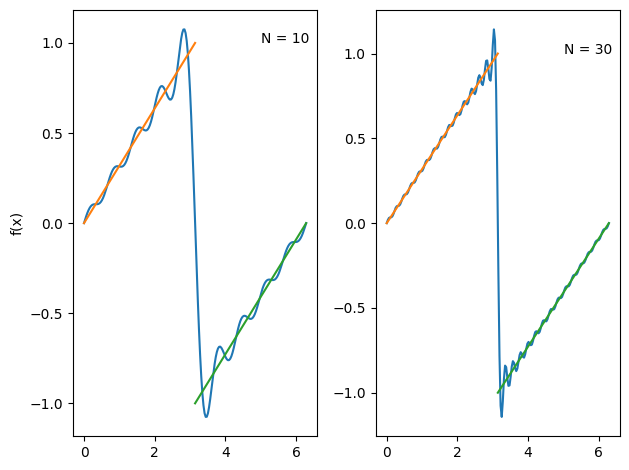

In [ ]:
%reset -f

from sympy import symbols, integrate, sin, cos, pi
import matplotlib.pyplot as plt
import numpy as np
print('-'*28,'CODE OUTPUT','-'*29,'\n')

x = symbols('x')        # define symbols
n = symbols('n', integer = True,positive=True)

print("Coefficients an = ",(1/pi**2)*integrate(x*cos(n*x),(x,-pi,pi)))
print("Coefficients bn = ",(1/pi**2)*integrate(x*sin(n*x),(x,-pi,pi)))

# function to evaluate Fourier f(x) by summing the series terms
def T(numTerms):
    suma = [0]*len(x)
    for n in range(1,numTerms):
        suma = suma+(2/np.pi)*(-1)**(n+1)/n*np.sin(n*x)
    return suma

# positions along the x-axis
x = np.linspace(0,2*np.pi,200)
x1 = np.linspace(0,np.pi,100)
x2 = np.linspace(np.pi,2*np.pi,100)

# call function to evaluate f(x) for different numTerms
plt.subplot(1,2,1)
numTerms = 10
plt.plot(x, T(numTerms))
plt.plot(x1,x1/np.pi)
plt.plot(x2,-1+(x2-np.pi)/np.pi)
plt.text(5,1,'N = '+str(numTerms))
plt.ylabel('f(x)')

plt.subplot(1,2,2)
numTerms = 30
plt.plot(x, T(numTerms))
plt.plot(x1,x1/np.pi)
plt.plot(x2,-1+(x2-np.pi)/np.pi)
plt.text(5,1,'N = '+str(numTerms))
plt.tight_layout()
plt.show()


# Example 6.9

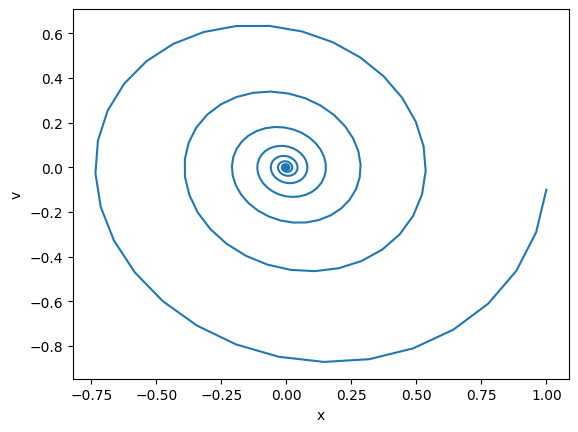

In [ ]:
%reset -f

import matplotlib.pyplot as plt
import numpy as np

A, omega, phi, gamma = 1, 1, 0, 0.1
t = np.linspace(0,100,500)

x = A*np.exp(-gamma*t)*np.cos(omega*t-phi)

# v = dx/dt
v = -A*(gamma*np.cos(omega*t - phi) +\
        omega*np.sin(omega*t - phi))*np.exp(-gamma*t)

plt.plot(x,v)
plt.ylabel('v')
plt.xlabel('x')
plt.show()
